<a href="https://colab.research.google.com/github/GeonKimdcu/DeepLearning/blob/main/Chapter03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 03 신경망 학습

---



## 3.1 신경망 학습의 의미

신경망은 입력 데이터가 들어와도 어떤 출력을 만들어야 할지 알지 못하며 그 **규칙**을 **학습 데이터**를 이용해서 스스로 찾아내야만 한다. 학습 데이터에는 기대하는 정답이 들어 있어서 규칙을 찾아낼 수 있다. <br>
따라서 신경망이 학습한다는 것은 이 <font color = 'ff6f61'>규칙을 찾는 과정</font>을 의미한다.

신경망에 입력 데이터가 들어왔을 때 어떤 출력 데이터를 만들어야 할지를 정하는 규칙은 함수적 매핑 관계로 표현된다.<br>
가중 합산과 활성 함수가 연결되어 뉴런을 구성하고, 뉴런이 모여 계층을 구성하며, 계층이 쌓여서 신경망의 계층 구조가 정의된다. <br>

이처럼 신경망의 요소들이 이루는 복잡한 신경망의 계층 구조 자체가 신경망의 함수적 매핑 관계를 표현하는 것이다.

신경망의 학습 과정에서 함수적 매핑 관계를 표현하는 전체 계층 구조를 찾아야 하는 것은 아니다. **신경망의 구조와 관련된 것들은 학습 전에 미리 정해두고**, <font color='#ff6f61'>**학습 과정에서는 모델 파라미터(model parameter)의 값을 찾는다.**</font>

예를 들어 집값을 예측하는 **규칙은 신경망을 구성하는 모든 뉴런의 가중치와 편향이 결정될 때 완성**된다. <br>
따라서 **학습 과정**에서 정확한 집값을 예측하도록 신경망 모델의 <font color='#ff6f61'>**가중치와 편향을 조정**</font>해 나가며, **최적의 값이 결정되면 모델은 집값을 예측할 수 있는 추론 능력을 갖춘다.**

신경망 학습이 <font color='#ff6f61'>**모델의 파라미터값을 찾는 과정**</font>이라면, 과연 어떤 방법으로 최적의 파라미터 값을 찾아내는 것일까?

신경망 학습에서는 **최적화**(optimization)기법을 사용한다. <br>
최적화 기법은 <font color='#ff6f61'>함수의 해를 근사적으로 찾는 방법</font>으로, **신경망이 관측 데이터를 가장 잘 표현하는 함수가 되도록 만들어준다.**

## 3.2 신경망 학습과 최적화

### 3.2.1 최적화란?

**최적화**란? 유한한 방정식으로 정확한 해를 구할 수 없을 때 <font color='#ff6f61'>근사적으로 해를 구하는 방법</font>으로, 다양한 제약 조건을 만족하면서 목적 함수를 최대화하거나 최소화하는 해를 반복하여 조금씩 접근하는 방식으로 찾아가는 방법이다.

#### <a href=https://pasus.tistory.com/72>최적화 문제의 표준 형태</a>
(제약 조건 이해 안되면 참고!)

최적화 문제는 수학적으로 다음과 같은 표준 형태로 정의한다.

$$\displaystyle \min_{x \in D} \quad f(x) \\ subject \; to \; g_i(x) \leq 0, \quad i=1,...,m \\ \quad \quad  \quad \;\; h_j(x)=0, \quad j=1,...,r$$

<br>

최적화 문제는 **목적 함수**(objective function) $f(x)$와 여러 **제약 조건**(constraints)으로 이루어진다. <br>
제약 조건은 부등식 형태의 제약 조건 $g_i(x) \leq 0$ 과 등식 형태의 제약 조건 $h_j(x)=0$ 로 구분된다.

표준 최적화 문제는 '**변수 $x$에 대한 등식과 부등식으로 표현되는 여러 제약 조건을 만족하면서 목적 함수인 $f(x)$를 최소화하는 $x$의 값을 찾는 문제**'로 풀어서 설명할 수 있습니다.

최적화를 통해 찾은 $x$의 값을 **최적해**(optimal solution)라고 하며, <font color='#ff6f61'> 최적해에 점점 가까이 가는 상태</font>를 '<font color='#ff6f61'>**수렴한다**</font>'(coverge)고 하고 최적해를 찾으면 '**수렴했다**'고 한다.



---
✨최소화 문제에서 목적 함수는 **비용 함수**(cost function) 또는 <font color='#ff6f61'>**손실 함수**</font>(loss function)라고 부르며, 최대화 문제에서는 **유틸리티 함수**(utility function)라고 부른다. <br>
✨앞으로 별다른 언급이 없으면 신경망 학습을 최소화 문제로 정의하고 목적 함수를 손실 함수라고 표기하겠다.


### 3.2.2 신경망 학습을 위한 최적화 문제 정의

#### 회귀 문제를 최적화 문제로 정의한다면?

회귀 문제는 '<font color='#ff6f61'>**타깃과 예측값의 오차를 최소화하는 파라미터를 찾으라**</font>'라는 최적화 문제로 다음과 같이 정의할 수 있다.

$$\displaystyle \min_{\theta} \quad \frac {1}{N} \sum_{i=1}^{N} ||t_i-y(x_i;\theta)||_2^2$$

회귀 문제에서 손실 함수는 <font color='#ff6f61'>**평균 제곱 오차**</font>(MSE:mean square error)로 정의되며 <font color='#ff6f61'>타깃과 예측값의 오차</font>를 나타낸다.

#### 분류 문제를 최적화 문제로 정의한다면?

분류 문제는 확률 모델 관점에서 '<font color='#ff6f61'>**관측 확률분포와 예측 확률분포의 차이를 최소화하는 파라미터를 찾으라**</font>'라는 최적화 문제로 다음과 같이 정의할 수 있다.

$$\displaystyle \min_\theta \quad -\frac{1}{N} \sum_{i=1}^{N}\sum_{k=1}^{K}t_{ik}\centerdot log\mu (x_i;\theta)_k$$

분류 문제에서 손실 함수는 <font color='#ff6f61'>**크로스 엔트로피**</font>(cross entropy)로 정의되며, <font color='#ff6f61'>타깃의 확률분포와 모델 예측 확률분포의 차이</font>를 나타낸다.

### 3.2.3 최적화를 통한 신경망 학습

신경망 학습을 위한 최적화 문제가 정의되었다면 최적화를 통해 신경망 학습을 수행한다. <br>
최적화는 손실 함수의 최소 지점을 찾아가는 과정이다.

<img width=400 src=https://user-images.githubusercontent.com/48666867/147043483-8daf692a-e2e6-4e79-84ca-facb1ea7ab3f.jpg>

Ref. Deep Learning textbook

동그라미로 표시된 <font color='#ff6f61'>**손실 함수의 최소 지점으로 가야 신경망 모델 파라미터의 최적해를 찾을 수 있다.**</font> 손실 함수의 임의의 위치에서 출발해서 최적해가 있는 최소 지점을 찾아가는 과정을 <font color='#ff6f61'>**최적화 과정**</font>이라고 한다.

## 3.3 경사 하강법

### 3.3.1 신경망의 학습 목표

신경망의 손실 함수는 차원이 매우 높고 복잡한 모양을 하고 있어서 최적화가 어렵다. <br>
손실 함수에는 하나의 <font color='#ff6f61'>**전역 최소**</font>(global minimum)와 함께 수많은 <font color='#ff6f61'>**지역 최소**</font>(local minimum)가 있다. <br>

* 전역 최소: 함수 전체에서 가장 낮은 곳
* 지역 최소: 함수에서 부분적으로 낮은 곳

<img width=400 src=https://user-images.githubusercontent.com/48666867/147078361-34ca3efa-9cab-4620-be7b-cb97100ac789.png>

Ref. https://gooopy.tistory.com/67

위 그림과 같이 손실 함수를 2차원 그래프로 단순화해서 표현해 보면 **궁극적으로 찾으려는 최적해**는 **전역 최소에 해당하는 파라미터값**이 되겠지만, **전역 최소를 찾으려면 곡면의 전체 모양을 확인**해야 하므로 **계산 비용이 많이 든다.** <br>
또한 문제가 크고 복잡한 경우 전역 최소를 찾기가 어렵고 떄로는 불가능할 수 있다. 따라서 <font color='#ff6f61'>**대부분의 최적화 알고리즘의 목표는 지역 최소를 찾는 것**</font>이다. <br>
단, 좋은 지역 최소를 찾기 위해선 해를 여러 번 찾아서 그 중 가장 좋은 해를 선택하거나 동시에 여러 해를 찾아서 함께 고려하기도 한다.


### 3.3.2 신경망 학습을 위한 최적화 알고리즘

일반적으로 최적화 문제는 관측 변수가 많고 **닫힌 형태**로 정의되지 않기 때문에 함수를 미분해서 최대, 최소를 구할 수 없다. <br>
그렇기에 <font color='#ff6f61'>**임의의 초기화 상태에서 반복적으로 조금씩 해에 접근해 가는 방식**</font>을 취한다.

최적화 알고리즘은 손실 함수 곡면을 매번 근사하는데 이때 사용되는 미분의 차수에 따라 **1차 미분**, **1.5차 미분**, **2차 미분** 방식으로 나뉜다.

* 1차 미분
  - 경사 하강법
  - 경사 하강법의 변형 알고리즘: SGD, SGD 모멘텀, AdaGrad, RMSProp, Adam

* 1.5차 미분
  - 준 뉴턴 방법(quasi-newton method)
  - 켤레 경사 하강법(conjugate gradient descent)
  - 레벤버그-마쿼트 방법(levenberg-marquardt method)

* 2차 미분
  - 뉴턴 방법(newton method)
  - 내부점법(Interior point method)

2차 미분 방식은 곡률(curvature)을 사용하므로 최적해를 빠르게 찾을 수 있다는 장점은 있지만, 손실 함수 곡면이 볼록(convex)해야만 최적해를 찾을 수 있으며 계산 비용과 메모리 사용량이 많기 때문에 신경망에서는 사용하기 어렵다.<br>

1.5차 미분 방식은 1차 미분을 이용해서 2차 미분을 근사하는 방식으로 최적해를 빠르게 찾을 수 있다. 하지만 신경망 학습과 별도로 2차 미분을 근사하는 알고리즘을 실행해야 하고 근사된 2차 미분값을 저장해야 하므로 메모리 사용량이 많다. <br>

**1차 미분 방식의 경우 상대적으로 수렴 속도는 느리지만, 손실 함수 곡면이 볼록하지 않아도 최적해를 찾을 수 있어서 손실 함수 곡면이 매우 복잡한 신경망에서 안정적으로 사용하기 좋다.** <br>

따라서 신경망에서는 주로 1차 미분 방식인 경사 하강법과 이를 개선한 알고리즘을 주로 사용한다.

### 3.3.3 경사 하강법

**경사 하강법**(gradient descent)은 손실 함수의 최소 지점을 찾기 위해 <font color='#ff6f61'>**경사가 가장 가파른 곳을 찾아서 한 걸음씩 내려가는 방법**</font>이다. <br>
현재 위치에서 **경사가 가장 가파른 곳**을 찾기 위해 **손실 함수의 기울기를 구하고 기울기의 반대 방향으로 내려간다.**

<img width=400 src=https://user-images.githubusercontent.com/48666867/147096617-1f85fad8-07b1-41db-bc96-903269999887.png>

Ref. http://taewan.kim/post/cost_function_derivation/

위 그림에서 Initial Weights 지점에서 출발한다고 하면 **먼저 기울기를 구해서 기울기의 반대 방향으로 한 걸음 내려간다. 한 걸음 내려간 지점에서 다시 기울기를 구하고 한 걸음 내려가는 과정을 반복하면 결국 최소 지점에 도달할 것이라고 가정**하는 방식이 바로 경사 하강법이다.

경사 하강법으로 손실 함수의 현재 위치 $\theta$ 에서 다음 위치 $\theta^+$로 한 걸음 이동하려면 다음과 같은 업데이트 식을 사용한다. <br>

$$\theta^+=\theta - a\frac{\partial J}{\partial \theta}$$

여기서 $a$는 **스텝 크기**(step size) 또는 **학습률**(learning rate)로 <font color='#ff6f61'>이동 폭</font>을 결정한다. <br>
$-\frac{\partial J}{\partial \theta}$는 **이동 방향**(step direction)으로 <font color='#ff6f61'>기울기의 음수 방향</font>을 나타내므로 현재 지점에서 가장 가파른 내리막길로 내려가겠다는 의미이다.

경사 하강법에서는 파라미터 업데이트 과정을 반복하다가 $\theta - \theta^+$가 임계치 이하가 되면 최소 지점에 도달한 것으로 판단하고 이동을 멈춘다. <br>
기울기 $\frac{\partial J}{\partial \theta}$는 손실 함수 $(J(f(x;\theta),t)$를 파라미터 $\theta$에 대해 미분한 <font color='#ff6f61'>**그레디언트**</font>이다.

> 그레디언트

**그레디언트**(gradient)란 $R^n \rightarrow R$ 형태의 <font color='#ff6f61'>**실수 함수의 미분**</font>을 말한다. <br>
$f(x) = f(x_1,x_2,...,x_n)$와 같이 변수 $x$가 $n$차원 벡터이고 함숫값이 실수인 경우, <font color='#ff6f61'>**입력 벡터의 요소별로 함수 $f(x)$를 편미분한 벡터**</font>를 그레디언트라고 한다. <br>
따라서 그레디언트는 $x$에서 함수 $f(x)$가 **증가하는 방향과 증가율**을 나타낸다.

$$\triangledown f=\begin{bmatrix}\frac{\partial f}{\partial x_1}\\\frac{\partial f}{\partial x_2}\\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix}\\ f:R^n \rightarrow R$$

신경망의 손실 함수 $J(f(x;\theta), t)$는 실수 함수이고 모델의 파라미터는 $\theta$는 벡터이기 때문에 **손실 함수를 파라미터로 미분하면 그레디언트가 된다.**


---
✨'그레디언트를 계산한다'는 표현은 '미분한다'는 표현과 동일하다.


### 3.3.4 신경망에 경사 하강법 적용

#### 2계층 신경망 회귀 모델

다음과 같이 2계층 신경망으로 구성된 회귀 모델이 있다고 하자. <br>
은닉 계층의 활성 함수는 ReLU이고, 회귀 모델이므로 출력 계층의 활성 함수는 항등 함수이고 손실 함수는 $J=(y,t)$는 평균제곱오차이다.

<img width=400 src=https://user-images.githubusercontent.com/48666867/147179761-9beabd18-25d1-4756-ac42-06c35b52120b.jpg>

Ref. Deep learning textbook

참고로, $w^1_{nm}$ 표기를 설명하자면 위 첨자 1은 계층 번호이고, 아래 첨자 $n$은 입력 뉴런의 인덱스를, $m$은 은닉 뉴런의 인덱스를 나타낸다.

#### 파라미터 업데이트 식

**경사 하강법을 이용해서 가중치 $w^1_{nm}$ 값을 업데이트** 하려면 먼저 **손실 함수에 대한 가중치의 미분 $\frac {\partial J}{\partial w^1_{nm}}$를 구해서 다음 업데이트 식으로 $w^1_{nm}$를 $w_{nm}^{1\;+}$로 변경**한다.

$$w_{nm}^{1\;+}=w_{nm}^{1}-a\frac {\partial J}{\partial w^1_{nm}}$$

그런데 이 업데이트 식은 바로 계산할 수 없다. **손실 함수 $J(y,t)=\frac{1}{N}\displaystyle \sum_{(x,t)\in D}^{N} ||t-y||_2^2$에는 가중치 변수  $w^1_{nm}$가 포함되지 않기 때문이다.** <br>
즉, 손실 함수는 합성 함수로 정의되며 <font color='#ff6f61'>**합성 함수를 미분하려면 연쇄 법칙(chain rule)을 사용**</font>해야 한다. <br>
연쇄 법칙을 사용해서 $\frac {\partial J}{\partial w^1_{nm}}$를 표현하면 다음과 같은 형태가 된다.

$$\frac {\partial J}{\partial w^1_{nm}} = \frac {\partial J}{\partial y} \centerdot \frac {\partial y}{\partial z^2} \centerdot \frac {\partial z^2}{\partial a^1_m} \centerdot \frac {\partial a_m^1}{\partial z^1_m} \centerdot \frac {\partial z_m^1}{\partial w^1_{nm}}$$

#### 연쇄 법칙을 사용한 미분 계산

연쇄 법칙으로 합성 함수의 미분을 표현할 때는 합성 함수의 실행 순서에 따라 각 함수의 미분을 곱해준다. <br>
가중치 변수 $w^1_{nm}$가 정의된 은닉 뉴런부터 손실 함수까지 실행되는 함수의 순서는 다음과 같다.

(1) $\quad$ $z^1_m = w^1_{1m} \centerdot x_1 + w^1_{2m} \centerdot x_2 + \dotsb + w^1_{nm} \centerdot x_n \quad \dotsb \quad \displaystyle \frac {\partial z^1_m}{\partial w^1_{nm}}=x_n$

(2) $\quad$ $a^1_m=ReLU(z^1_m) \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \; \dotsb \quad \displaystyle \frac {\partial a^1_m}{\partial z^1_m}=ReLU'(z^1_m)$

(3) $\quad$ $z^2=w^2_1 \centerdot a^1_1 + w^2_2 \centerdot a^1_2 + \dotsb + w^2_m \centerdot a^1_m \quad \quad  \;\dotsb \quad \displaystyle \frac{\partial z^2}{\partial a^1_m}=w^2_m $

(4) $\quad$ $y = Identity(z^2) \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \;\dotsb \quad \displaystyle \frac{\partial y}{\partial z^2}=Identity'(z^2)=1$

(5) $\quad$ $J(y)=\displaystyle \frac{1}{N}\displaystyle \sum_{(x,t) \in D}^{N}||t-y||^2_2 \quad \quad \quad \quad \quad \quad \;\;\, \dotsb \quad \displaystyle \frac{\partial J}{\partial y} = -\frac{1}{N}\sum_{(x,t)\in D}^{N}2(t-y)$

식 (1)과 (2)는 은닉 뉴런 $h_m$에 정의된 가중 합산과 ReLU이다. 식 (3)과 (4)는 출력 뉴런 $O$에 정의된 가중 합산과 항등 함수이고 식 (5)는 손실 함수이다. <br>
각 함수의 미분은 다음과 같이 계산한다.

- 식 (1)의 미분 $\displaystyle \frac {\partial z^1_m}{\partial w^1_{nm}}$는 가중 합산 $z^1_m$을 가중치 변수 $w^1_{nm}$로 미분한 값

- 식 (2)의 미분 $\displaystyle \frac {\partial a^1_m}{\partial z^1_m}$는 활성 함수 $a^1_m$을 입력 변수 $z^1_m$로 미분한 값

- 식 (3)의 미분 $\displaystyle \frac {\partial z^2}{\partial a^1_m}$는 가중 합산 $z^2$을 입력 변수 $a^1_m$로 미분한 값

- 식 (4)의 미분 $\displaystyle \frac {\partial y}{\partial z^2}$는 활성 함수 $y$을 입력 변수 $z^2$로 미분한 값

- 식 (5)의 미분 $\displaystyle \frac {\partial J}{\partial y}$는 손실 함수 $J(y,t)$을 입력 변수 $y$로 미분한 값

최종적으로 각 함수의 미분을 곱하면 연쇄 법칙 형태의 $\displaystyle \frac {\partial J}{\partial y} \centerdot \frac {\partial y}{\partial z^2} \centerdot \frac {\partial z^2}{\partial a^1_m} \centerdot \frac {\partial a_m^1}{\partial z^1_m} \centerdot \frac {\partial z_m^1}{\partial w^1_{nm}}$로 $\displaystyle \frac {\partial J}{\partial w^1_{nm}}$를 정의할 수 있다.

$$\frac {\partial J}{\partial w^1_{nm}} = \frac {\partial J}{\partial y} \centerdot \frac {\partial y}{\partial z^2} \centerdot \frac {\partial z^2}{\partial a^1_m} \centerdot \frac {\partial a_m^1}{\partial z^1_m} \centerdot \frac {\partial z_m^1}{\partial w^1_{nm}}\\=-\frac{1}{N}\sum_{(x,t)\in D)}^{N}2(t-y)\centerdot 1 \centerdot w^2_m \centerdot ReLU'(z^1_m) \centerdot x_n$$

이제 이 결과를 파라미터 업데이트 식에 적용하면 경사 하강법이 완성된다. <br>

$$w^{1\; +}_{nm}=w^1_{nm}-a\frac{\partial J}{\partial w^1_{nm}} \\ = w^1_{nm}-a(-\frac{1}{N}\sum_{(x,t)\in D)}^{N}2(t-y)\centerdot 1 \centerdot w^2_m \centerdot ReLU'(z^1_m) \centerdot x_n)$$

## 3.4 역전파 알고리즘

신경망에 경사 하강법을 적용할 때 **손실 함수에서 각 가중치까지 신경망의 역방향으로 실행했던 함수를 따라가며 미분을 계산해서 곱했다.** <br>
만일 이 과정을 **모든 파라미터에 대해 개별적으로 진행**한다면 <font color='#ff6f61'>**같은 미분을 여러 번 반복**</font>하는 비효율성 문제가 생긴다. 이런 문제를 해결하고자 제안된 방법이 바로 오차의 <font color='#ff6f61'>**역전파 알고리즘**</font>(backpropagation algorithm)이다.

### 3.4.1 역전파 알고리즘

뉴런 $h_m$의 또 다른 가중치 $w^1_{n-1m}$에 대해 미분한다고 해보자. <br>
연쇄 법칙으로 미분을 표현해보면 마지막 항인 $\frac {\partial z^1_m}{\partial w^1_{n-1m}}$를 제외한 앞 부분의 $\frac {\partial J}{\partial y} \centerdot \frac {\partial y}{\partial z^2} \centerdot \frac {\partial z^2}{\partial a^1_m} \centerdot \frac {\partial a_m^1}{\partial z^1_m}$가 $w^1_{nm}$의 미분과 동일하다는 것을 알 수 있다.

<img width=400 src=https://user-images.githubusercontent.com/48666867/147188866-d66e2d6e-f42e-48a1-9830-3d76f0999f70.JPG>

Ref. Deep learning textbook

따라서 공통부분은 한 번 계산해두면 같은 뉴런에 속한 모든 가중치의 미분을 계산할 때 **재사용**할 수 있다.

<img width=400 src=https://user-images.githubusercontent.com/48666867/147188873-e639669c-dda4-4795-9a9c-537aed1b677d.jpg>

Ref. Deep learning textbook

공통부분의 계산을 중복하지 않으려면 <font color='#ff6f61'>**손실 함수에서 시작해서 입력 계층 방향으로 계산된 미분값을 역방향으로 전파**</font>해주면 된다. <br>
이때 각 뉴런의 공통부분에 해당하는 미분값을 오차라고 하며, 오차를 역방향으로 전파하면서 미분을 계산한다고 해서 이러한 계산 방식을 오차의 <font color='#ff6f61'>**역전파 알고리즘**</font>이라고 부른다.

### 3.4.2 역전파 알고리즘의 실행 순서

역전파 알고리즘에서 손실 함수부터 시작해 가중치 $w^1_{nm}$에 도달할 때가지 미분이 어떤 순서로 실행되는지 확인해 보자.

#### 손실 함수 미분

역전파 알고리즘은 손실 함수부터 시작하므로, 먼저 **손실 함수에 대한 입력의 미분을 계산해서 출력 계층에 전달**한다.

<img width=400 src=https://user-images.githubusercontent.com/48666867/147189451-8b8ead44-94d6-41bb-ac43-96bcfc3c94c3.jpg>

Ref. Deep learning textbook

(1) 손실 함수 미분 <br>
- 손실 함수 지역 미분: 손실 함수 $J(y)=\displaystyle \frac{1}{N}\sum_{(x,t) \in D}^{N}||t-y||^2_2$의 지역 미분 $\partial J \over \partial y$을 계산한다.
- 손실 함수 전역 미분: 손실 함수 전역 미분은 지역 미분 $\partial J \over \partial y$와 같다.

(2) 출력 뉴런에 미분 전달
- 손실 함수 전역 미분 $\partial J \over \partial y$을 출력 계층 $O$에 전달한다.

#### 출력 뉴런 미분

출력 뉴런 $O$는 전역 미분 $\partial J \over \partial y$을 전달받고 가중치의 미분을 계산해서 가중치를 업데이트하고 입력의 미분을 계산해서 은닉 계층에 전달한다. <br>
$O$는 활성 함수 $y=Identity(z^2)$와 가중 합산 $z^2=w^2_1 \centerdot a^1_1+w^2_2 \centerdot a^1_2+ \dotsb + w^2_m \centerdot a^1_m$으로 이루어지므로 미분을 별도로 수행해야 한다.

<img width=500 src=https://user-images.githubusercontent.com/48666867/147190540-4cbfc112-baa4-4c95-9610-3a6fe60dfd35.jpg>

Ref. Deep learning textbook

(1) 공통부분 계산
- 활성 함수 지역 미분: 활성 함수 $y=Identity(z^2)$의 지역 미분 $\partial y \over \partial z^2$를 계산한다.
- 활성 함수 전역 미분: $\partial J \over \partial y$과 $\partial y \over \partial z^2$을 곱해서 활성 함수 전역 미분 $\frac{\partial J}{\partial z^2}=\frac{\partial J}{\partial y} \centerdot \frac{\partial y}{\partial z^2}$를 계산한다.
- 공통부분 계산: 활성 함수의 전역 미분 $\partial J \over \partial z^2$이 뉴런의 공통부분이 된다.

(2) 가중치 업데이트
- 가중치 지역 미분: 가중 합산 식 $z^2 = w^2_1 \centerdot a^1_1 + w^2_2 \centerdot a^1_2 \dotsb + w^2_m \centerdot a^1_m$에 대해 가중치별로 지역 미분 $\frac{\partial z^2}{\partial w^2_1}, \frac{\partial z^2}{\partial w^2_2}, ..., \frac{\partial z^2}{\partial w^2_m}$를 계산한다.
- 가중치 전역 미분: 공통부분 $\frac {\partial J}{\partial z^2}$과 $\frac{\partial z^2}{\partial w^2_1}, \frac{\partial z^2}{\partial w^2_2}, ..., \frac{\partial z^2}{\partial w^2_m}$를 곱해서 가중치의 전역 미분 $\frac {\partial J^2}{\partial w^2_1}, \frac {\partial J^2}{\partial w^2_2}, ..., \frac {\partial J^2}{\partial w^2_m}$를 계산한다.
- 가중치 업데이트:  $\frac{\partial J}{\partial w^2_1}, \frac{\partial J}{\partial w^2_2}, ..., \frac{\partial J}{\partial w^2_m}$으로 가중치 $w^2_1, w^2_2,...,w^2_m$를 업데이트한다.

(3) 은닉 계층에 미분 전달
- 입력 지역 미분: 가중 합산 식 $z^2 = w^2_1 \centerdot a^1_1 + w^2_2 \centerdot a^1_2 \dotsb + w^2_m \centerdot a^1_m$에 대해 입력별로 지역 미분 $\frac{\partial z^2}{\partial a^1_1}, \frac{\partial z^2}{\partial a^1_2}, ..., \frac{\partial z^2}{\partial a^1_m}$를 계산한다.
- 입력 전역 미분: 공통부분 $\frac {\partial J}{\partial z^2}$과  $\frac{\partial z^2}{\partial a^1_1}, \frac{\partial z^2}{\partial a^1_2}, ..., \frac{\partial z^2}{\partial a^1_m}$를 곱해서 입력의 전역 미분 $\frac {\partial J}{\partial a^1_1}, \frac {\partial J}{\partial a^1_2}, ..., \frac {\partial J}{\partial a^1_m}$를 계산한다.
- 은닉 뉴런에 미분 전달: 은닉 뉴런 $h_1, h_2, ..., h_m$에 입력의 전역 미분 $\frac {\partial J}{\partial a^1_1}, \frac {\partial J}{\partial a^1_2}, ..., \frac {\partial J}{\partial a^1_m}$를 전달한다.

#### 은닉 뉴런 미분

은닉 뉴런 $h_m$은 전역 미분 $\frac {\partial J}{\partial a^1_m}$을 전달받고 가중치의 미분을 계산해서 가중치를 업데이트하고 다음 은닉 계층이 없으면 입력의 미분을 계산하지 않는다. <br>
$h_m$은 활성 함수 $a^1_m = ReLU(z^1_m)$와 가중 합산 $z^1_m = w^1_1 \centerdot x_1 + w^1_2 \centerdot x_2 \dotsb + w^1_{nm} \centerdot x_n$으로 이뤄져 있으므로 미분을 별도로 수행해야 한다.

<img width=500 src=https://user-images.githubusercontent.com/48666867/147190534-164db8e2-52d8-40eb-b36b-76049e4e9172.jpg>

Ref. Deep learning textbook

(1) 공통부분 계산
- 활성 함수 지역 미분: 활성 함수 $a^1_m=ReLU(z^1_m)$의 지역 미분 $\frac{\partial a^1_m}{\partial z^1_m}$를 계산한다.
- 활성 함수 전역 미분: $\frac {\partial J}{\partial a^1_m}$과 $\frac {\partial a^1_m}{\partial z^1_m}$을 곱해서 활성 함수 전역 미분 $\frac {\partial J}{\partial z^1_m}=\frac {\partial J}{\partial a^1_m} \centerdot \frac {\partial a^1_m}{\partial z^1_m}$를 계산한다.
- 공통부분 계산: 활성 함수의 전역 미분 $\frac {\partial J}{\partial z^1_m}$이 뉴런의 공통 부분이 된다.

(2) 가중치 업데이트
- 가중치 지역 미분: 가중 합산 식 $z^1_m = w^1_{1m} \centerdot x_1 + w^1_{2m} \centerdot x_2 \dotsb + w^1_{nm} \centerdot x_n$에 대해 가중치별로 지역 미분 $\frac{\partial z^1_m}{\partial w^1_{1m}}, \frac{\partial z^1_m}{\partial w^1_{2m}}, ..., \frac{\partial z^1_m}{\partial w^1_{nm}}$를 계산한다.
- 가중치 전역 미분: 공통 부분 $\frac{\partial J}{\partial z^1_m}$과 $\frac{\partial z^1_m}{\partial w^1_{1m}}, \frac{\partial z^1_m}{\partial w^1_{2m}}, ..., \frac{\partial z^1_m}{\partial w^1_{nm}}$를 곱해서 가중치의 전역 미분 $\frac{\partial J}{\partial w^1_{1m}}, \frac{\partial J}{\partial w^1_{2m}}, ..., \frac{\partial J}{\partial w^1_{nm}}$를 계산한다.
- 가중치 업데이트: $\frac{\partial J}{\partial w^1_{1m}}, \frac{\partial J}{\partial w^1_{2m}}, ..., \frac{\partial J}{\partial w^1_{nm}}$으로 가중치 $w^1_{1m}, w^1_{2m},...,w^2_{nm}$를 업데이트한다.

(3) 입력 계층에 미분 전달
- 입력 계층에는 가중치가 없으므로 미분을 전달하지 않아도 된다.


#### 역전파 알고리즘 종료

은닉 계층의 가중치 업데이트가 완료되면 역전파 알고리즘도 종료한다.

### 3.4.3 뉴런 관점에서 보는 역전파 알고리즘

<img width=500 src=https://user-images.githubusercontent.com/48666867/147195063-d389e0f3-d5c7-49b8-aea9-b3ca5271cc7c.png><br>
(이미지에서 보이는 $L$은 손실함수 $J$와 같은 의미이다.)

Ref. velog.io/@qsdcfd

다음과 같이 입력 $x, y$가 있고 활성 함수 $z=f(x,y)$를 실행하는 뉴런이 있다고 하자. 뉴런 출력 $z$는 손실 함수 $J(z)$의 입력이다.

역전파 알고리즘을 적용하기 위해, 먼저 손실 함수 $J(z)$를 $z$에 대해 미분해서 $\frac {\partial J}{\partial z}$를 구하고 뉴런에 미분값을 전달한다. <br>
다음으로 뉴런의 지역 미분을 구하기 위해, 함수 $f(x,y)$를 $x,y$에 대해 미분해서 $\frac {\partial z}{\partial x}$와 $\frac {\partial z}{\partial y}$를 구한다.

$$\frac {\partial z}{\partial x} = \frac{\partial f(x,y)}{\partial x}\\
\frac {\partial z}{\partial y} = \frac{\partial f(x,y)}{\partial y}$$

그리고 전달 받은 전역 미분 $\frac {\partial J}{\partial z}$와 지역 미분 $\frac {\partial z}{\partial x}$와 $\frac {\partial z}{\partial y}$를 곱해서 $J(z)$에 대한 $(x,y)$의 전역 미분을 구한다.

$$\frac {\partial J}{\partial x} = \frac {\partial J}{\partial z} \centerdot \frac{\partial z}{\partial x} \\ \frac{\partial J}{\partial y} = \frac{\partial J}{\partial z} \centerdot \frac{\partial z}{\partial y}$$

계산된 전역 미분 $\frac {\partial J}{\partial x}$와 $\frac {\partial J}{\partial y}$를 다음 뉴런에 전달한다.

<br>

이와 같이 **하나의 뉴런 입장에서 미분을 계산하는 방식은 지역 미분을 구하고 전달받은 전역 미분에 곱하는 것**이 전부이다.  <br>

**뉴런의 가중치를 업데이트**하려면 1) <font color='#ff6f61'>가중치에 대한 지역 미분</font>을 구하고 2) 전달받은 <font color='#ff6f61'>전역 미분에 곱해서 가중치의 전역 미분을 계산</font>하며 3) 계산된 가중치의 전역 미분으로 가중치를 업데이트한다.

다음 은닉 계층에 미분을 전달하려면 1) 입력에 대한 지역 미분을 구하고 2) 전달받은 지역 미분에 곱해서 입력에 대한 전역 미분을 계산하며 3) 계산된 입력에 대한 전역 미분을 다음 은닉 뉴런에 전달한다.

#### 계층 단위의 미분

실제 구현할 때는 계층 단위로 계산하는데, 이때 달라지는 점은 뉴런에서 벡터로 표현했던 가중치가 계층에서는 **행렬**로 표현된다는 점이다. <br>
따라서 <font color='#ff6f61'>**뉴런에서 가중치의 미분을 나타내는 그레디언트는 벡터로 표현**</font>되지만, <font color='#ff6f61'>**계층에서 가중치와 미분을 나타내는 야코비안(jacobian)은 행렬로 표현**</font>된다.

> 야코비안

야코비안은 $f: R^n \rightarrow R^m$ 형태의 <font color='#ff6f61'>**벡터 함수의 미분**</font>을 말한다. $x=(x_1,x_2,...,x^n)$와 같이 입력이 $n$차원 벡터이고 $f(x) = (f_1(x), f_2(x),...,f_m(x))$와 같이 함숫값이 $m$차원 벡터인 경우, **입력의 차원별로 함숫값의 각 차원을 편미분해서 정의한 행렬을 야코비안**이라고 한다.

$$Jf=\begin{bmatrix}\displaystyle \frac {\partial f_1}{\partial x_1}&\displaystyle \frac {\partial f_1}{\partial x_2}&\dotsb&\displaystyle \frac {\partial f_1}{\partial x_n}\\\displaystyle \frac {\partial f_2}{\partial x_1}&\displaystyle \frac {\partial f_2}{\partial x_2}&\dotsb&\displaystyle \frac {\partial f_2}{\partial x_n}\\ \vdots & \quad & \ddots & \vdots \\ \displaystyle \frac {\partial f_m}{\partial x_1}&\displaystyle \frac {\partial f_m}{\partial x_2}&\dotsb&\displaystyle \frac {\partial f_m}{\partial x_n} \end{bmatrix}$$

$$f(x)=(f_1(x),f_2(x),...,f_m(x))$$
$$x=(x_1, x_2,...,x_n)$$


야코비안 행렬의 첫 번째 행은 $f_1(x)$를 $x_1, x_2, ..., x_n$ 별로 편미분한 값이다.

**역전파 알고리즘은 신경망과 같은 그래프 구조에서 연쇄 법칙을 이용하여 미분을 효과적으로 수행하기 위한 알고리즘**이다. <br>
따라서 신경망 학습은 역전파 알고리즘을 이용해서 미분을 계산하고 경사 하강법과 같은 최적화 알고리즘을 통해 파라미터를 업데이트하면서 최적해를 찾는 최적화 과정으로 볼 수 있다.

## 3.5 데이터셋 구성과 훈련 데이터 단위

### 3.5.1 데이터셋 구성

실생활에서 모집단을 구하기란 대부분 불가능하며, 현실적으로 모집단을 대표할 수 있는 표본 집단을 구성할 수 밖에 없다.

#### 관측 데이터의 구성

관측 데이터를 구성할 때 중요한 것은 **범주성 데이터**의 경우 <font color='#ff6f61'>클래스별로 비율을 맞추는 것</font>이다. <br>
$e.g.$ 인종을 분류할 때 어떤 인종의 데이터는 많고 어떤 인종의 데이터는 적다면 **편향된 추론**을 할 수 밖에 없다. <br>

만일 특정 클래스의 데이터를 확보하기 어려워 한쪽 클래스에 데이터가 치우친다면 **데이터를 강제로 늘려주거나** 데이터의 분포를 고려하여 손실 함수에 **가중치가 조절**되도록 알고리즘적으로 해결해야 한다.

**회귀 데이터**의 경우 입력 데이터가 근사하려는 **함수 범위를 잘 지지하고 있는지** 살펴봐야 한다. <br>


#### 데이터셋의 분리

관측 데이터가 준비되면 데이터를 **훈련 데이터셋**(train set), **검증 데이터셋**(validation set), **테스트 데이터셋**(test set)으로 분리한다. 훈련 데이터셋은 <font color='#ff6f61'>모델을 훈련</font>할 때 사용한다. 검증 데이터셋은 훈련된 모델의 성능을 평가해서 <font color='#ff6f61'>하이퍼파라미터를 튜닝</font>하는데 사용한다. 테스트 데이터셋은 훈련이 완료된 모델의 <font color='#ff6f61'>최종 성능을 평가</font>할 때 사용한다. <br>

이 세 종류의 데이터셋은 서로 <font color='#ff6f61'>중복되지 않도록 배타적으로 분리</font>해야 한다. 훈련에 사용하지 않았던 새로운 데이터로 평가해야 **일반화된 성능 평가**가 이루어지기 때문이다.

데이터셋을 분리할 때 중요한 원칙은 **분리된 데이터셋의 분포가 원래의 데이터 분포를 따르도록** 해야 한다.


---
✨보통 훈련 데이터셋과 테스트 데이터셋은 전체 관측 데이터에서 8:2, 7.5:2.5, 7:3 정도의 비율로 분할해서 만들며, 검증 데이터셋은 훈련 데이터셋에서 10%~20%정도를 분할해서 만든다.


### 3.5.2 훈련 데이터 단위

훈련 데이터셋을 한꺼번에 입력하는 방식을 <font color='#ff6f61'>**배치**</font>(batch)방식이라고 한다. 하지만 많은 학습 데이터를 사용하는 신경망에서는 주로 배치 방식으로 훈련하지는 않는다.

배치 방식의 한계를 극복하고자 데이터를 작은 단위로 묶어서 훈련하는 방식을 <font color='#ff6f61'>**미니배치**</font>(minibatch)방식이라고 한다.

일반적으로 신경망은 미니배치 방식으로 학습한다. 데이터 **샘플 단위**로 훈련할 수도 있는데 이런 방식을 **확률적(stochastic)방식**이라고 한다. 보통 **개별 샘플의 용량이 매우 클 때는 샘플 단위로 훈련**하기도 한다.

미니배치의 크기를 1로 하면 확률적 방식이 되고, 미니배치의 크기를 훈련 데이터셋 크기로 하면 배치 방식이 되므로 미니 배치 방식이 가장 융통성 있다.

#### 훈련 데이터 단위에 따른 경사 하강법의 종류

훈련 데이터의 단위에 따라 경사 하강법도 **배치 경사 하강법**(batch gradient descent), **미니배치 경사 하강법**(minibatch gradient descent), **확률적 경사 하강법**(stochastic gradient descent)으로 나뉜다.

배치 경사 하강법은 그레디언트를 정확히 계산하므로 훈련 경로를 부드럽게 만들지만, 확률적 방식은 하나의 샘플로 그레디언트를 근사하므로 상당히 많이 진동한다. 미니배치 방식도 작은 묶음의 샘플로 그레디언트를 근사하므로 두 방식의 중간 정도 수준에서 진동한다.

손실 함수가 **립시츠 연속**(Lipschitz continuous)성질을 만족할 경우 확률적 경사 하강법도 최적해로 수렴한다는 것이 증명되었다. 립시츠 연속 성질은 함수가 급격하게 변하지 않도록 함수 변화량의 상한을 갖는 성질이다. 따라서 손실 함수의 곡면이 어느 정도 부드럽게 변한다면 궤적이 진동하더라도 최소 지점을 향해 진행할 수 있다.


---
✨보통 경사 하강법은 배치 경사 하강법을 말하고 확률적 경사 하강법은 미니배치 경사 하강법을 포함한 의미로 사용한다. 그리고 확률적 경사 하강법을 간단히 **SGD**(stochastic gradient descent)라고 부른다.


### 3.5.3 미니배치 훈련 방식

#### 미니배치 훈련 방식의 성능이 우수한 이유

미니배치 방식을 사용하면 배치 방식보다 **학습이 더 빨라지고 모델의 성능이 좋아진다.**

미니 배치 방식은 데이터를 작은 단위로 묶어서 훈련하기 때문에 미니배치를 생성할 때마다 매번 다른 데이터로 묶인다. <br>
따라서 그때마다 조금씩 **다른 통계량을 갖는 <font color='#ff6f61'>확률적 성질**</font>이 생긴다.

확률적 성질이 생기면 **일반화 오류가 줄어들고 과적합이 방지되는 <font color='#ff6f61'>정규화 효과**</font>를 볼 수 있다. 또한 배치 방식으로 훈련하면 그레디언트 계산은 정확하지만 학습 속도가 느려진다. 이때 오히려 미니배치 방식으로 훈련하면 그레디언트는 근삿값을 갖지만 학습 속도가 빨라지고 정규화 효과 덕분에 좋은 최적해를 찾을 수 있다.

#### 미니배치의 크기는 어느 정도로 정해야 할까?

미니배치의 크기는 2의 거듭제곱으로 정해야 GPU 메모리를 효율적으로 사용할 수 있다.

## 3.6 손실 함수 정의

### 3.6.1 손실 함수를 정의하는 기준

**손실 함수는 모델이 관측 데이터를 잘 표현하도록 정의되어야 한다.** <br>
손실 함수가 달라지면 최적해의 위치가 바뀌므로 모델이 표현하는 함수도 달라진다. 결국 모델이 관측 데이터를 잘 설명하는 함수를 표현하려면, 손실 함수는 <font color='#ff6f61'>'최적해가 관측 데이터를 잘 설명할 수 있는 함수의 파라미터값이 되도록'</font> 정의되어야 한다.

따라서 이상적인 손실 함수를 정의하는 기준은 1) 모델이 <font color='#ff6f61'>**오차 최소화**(error minimization)</font>되도록 정의하거나 2) 모델이 추정하는 관측 데이터의 확률이 최대화되도록 <font color='#ff6f61'>**최대우도추정**(maximum likelihood estimation)</font> 방식으로 정의하는 방법이 있다.

#### 오차 최소화 관점

모델의 <font color='#ff6f61'>**오차는 모델의 예측과 관측 데이터의 타깃의 차이**</font>를 말한다. 손실 함수의 목표가 모델의 오차를 최소화하는 것이므로 손실 함수를 정의할 때 어떤 방식으로 오차의 크기를 측정할지만 정하면 된다.

#### 최대우도추정 관점

**우도**(likelihood)는 <font color='#ff6f61'>모델이 추정하는 관측 데이터의 확률</font>을 말한다. 손실 함수의 목표는 <font color='#ff6f61'>관측 데이터의 확률이 최대화되는 확률분포 함수를 모델이 표현</font>하도록 만드는 것이다. 이 방식은 확률 모델인 경우에만 적용할 수 있으며 **최대우도추정**(MLE)방식이라고 한다.


---
✨우도는 추정된 분포가 관측 데이터의 분포를 얼마나 잘 나타내는지 또는 일관되는지를 나타내는 측도이다.

<br>

두 방식이 손실 함수를 정의하는 관점은 다르지만, 손실 함수를 유도해 보면 동일한 최적해를 갖는 함수가 된다는 것을 확인할 수 있다.

### 3.6.2 오차 최소화 관점에서 손실 함수 정의

#### 모델의 오차와 손실 함수

신경망 모델은 파라미터 $\theta$로 이뤄져 있고 학습 데이터 $D=\{(x_i, t_i): i=1,...,N \}$가 있다고 하자. 모델의 예측을 $y(x_i; \theta)$라고 하고 타깃을 $t_i$라고 하면 오차 $ϵ_i$는 다음과 같다.

$$\epsilon_i=t_i-y(x_i;\theta)$$

오차의 크기를 나타내는 대표적인 함수는 벡터의 크기를 나타내는 **노름(norm)**이 있다. 주로 $L_2$ 노름과 $L_1$ 노름을 사용하며 이때 손실함수를 **평균제곱오차**(MSE:mean squared error)와 **평균절대오차**(MAE:mean absolute error)라고 부른다.

#### 평균제곱오차(MSE)

평균제곱오차는 $N$개의 데이터에 대해 **오차의 $L_2$ 노름의 제곱의 평균**으로 정의되며 $l_2$ 손실(loss)로 표기한다.

$$J(\theta)=\frac{1}{N}\displaystyle \sum_{i=1}^{N}||t_i-y(x_i;\theta)||_2^2$$

평균제곱오차는 <font color='#ff6f61'> 모델이 타깃 $t_i$의 평균(mean)을 예측</font>하도록 만든다. 오차가 커질수록 손실이 제곱승으로 증가하므로 **이상치에 민감**하게 반응하는 단점이 있다.

#### 평균절대오차(MAE)

평균절대오차는 $N$개의 데이터에 대해 **오차의 $L_1$노름의 평균**으로 정의하며 $l_1$손실로 표기한다.

$$J(\theta)=\frac{1}{N}\displaystyle \sum_{i=1}^{N}||t_i-y(x_i;\theta)||_1$$

평균절대오차는 <font color='#ff6f61'>모델이 타깃 $t_i$의 중앙값(median)을 예측</font>하도록 만든다. 오차가 커질수록 손실이 선형적으로 증가하므로 이상치에 덜 민감하다. 하지만 미분가능 함수가 아니기 때문에 구간별로 미분을 처리해야 하는 단점이 있다.



---
✨미분가능 함수라는 말이 이해가 안된다면 <a href=https://m.blog.naver.com/saomath/221971803914>여기 사이트</a>를 참조하자.


#### 오차 최소화 관점에서 최적화 문제 정의

평균제곱오차를 예로 정의해보면 다음과 같은 최적화 문제로 정의할 수 있다.

$$\theta^* = argmin_{\theta}  \; J(\theta) = argmin_\theta \frac {1}{N}\displaystyle \sum_{i=1}^{N}||t_i-y(x_i;\theta)||_2^2$$



### 3.6.3 최대우도추정 관점에서 손실 함수 정의

(식이 개선되어가는 흐름을 보면 이해가 될 것임)

#### 관측 데이터의 우도와 손실 함수

신경망 모델로 추정한 관측 데이터의 확률이 바로 우도 $p(D|\theta)$이다. 샘플 $(x_i, t_i)$가 서로 독립이므로 관측 데이터의 우도 $p(D|\theta)$는 $N$개의 샘플의 우도의 곱으로 표현할 수 있다.

$$p(D|\theta)= \displaystyle \prod_{i=1}^{N}p(t_i|x_t;\theta)$$

#### 최대우도추정 관점에서 최적화 문제 정의

우도를 최대화하는 확률 모델의 파라미터 $\theta$를 찾는 문제로 다음과 같이 정의할 수 있다.

$$\theta^*=argmax_\theta \; (D|\theta)=argmax_\theta \displaystyle \prod_{i=1}^{N}p(t_i|x_i;\theta)$$

#### 최대우도추정 관점의 최적화 문제 개선

최대우도추정의 경우 최적화 문제를 개선된 형태로 바꾸게 되면 수치적으로 다루기 쉬워질 뿐만 아니라 안정적으로 최적화할 수 있다. 또한 표준 형태의 최소화 문제로 통일할 수도 있다.($s.t.$ 오차 최소화)

1. 목적 함수를 개선된 형태로 만들기 위해 우도 대신 **로그 우도**(log likelihood)를 사용한다.
2. 최대화 문제를 최소화 문제로 변환하기 위해 목적 함수에 **음의 로그 우도**(negative log likelihood)를 사용한다.



#### 목적 함수를 로그 우도로 변환

로그 우도는 우도에 로그를 취한 형태를 말한다.

$$J(\theta)=log p(D|\theta)=\displaystyle log \prod_{i=1}^{N}p(t_i|x_i;\theta)=\sum_{i=1}^{N}logp(t_i|x_i;\theta)$$

우도 대신 로그 우도를 사용하는 이유는 다음과 같다.

1. 가우시안 분포 또는 베르누이 분포와 같은 **지수 함수** 형태로 표현되는 지수족(exponential family) 확률분포의 경우 **로그를 취하면 지수 항이 상쇄되어 다항식으로 변환되기 때문에 함수 형태가 다루기 쉬워진다.**

2. $N$개 샘플에 대한 **우도의 곱을 로그 우도의 합산으로 바꾸면 언더플로를 방지**할 수 있다. 확률은 1보다 작기 때문에 확률을 $N$번 곱하면 $N$이 커질수록 언더플로가 쉽게 생긴다. 따라서 우도 대신 로그 우도를 사용하면 곱이 합산 형태로 바뀌므로 언더플로를 방지할 수 있다.

3. 우도 대신 로그 우도를 사용해도 최적해는 달라지지 않는다.



#### 최대화 문제를 최소화 문제로 변환

로그 우도에 음수를 취한 음의 로그 우도, 즉 **NLL**(negative log likelihood)로 손실 함수가 정의된다.

$$NLL(\theta) = -logp(D|\theta) = \displaystyle - \sum_{i=1}^{N}logp(t_i|x_i;\theta)$$

이제 최대우도추정 문제가 다음과 같은 표준 형태의 최소화 문제로 재정의되었다.

$$\theta^*=argmin_\theta-\displaystyle \sum_{i=1}^{N}logp(t_i|x_i;\theta)$$



#### 회귀 문제에서 최대우도추정을 위한 손실 함수 정의

회귀 모델이 추정하는 가우시안 분포 $p(t_i|x_i;\theta)$는 신경망 모델이 출력한 평균 $y(x_i;\theta)$와 정밀도의 역수 $β^{-1}$ 를 분산으로 하는 분포로 정의된다.

$$p(t_i|x_i;\theta)=N(t_i|y(x_i;\theta), \beta^{-1})\\=\frac{1}{\sqrt{ \beta^{-1}2\pi}}e^{-\frac {(t_i-y(x_i;\theta))^2}{2\beta^{-1}}} $$

이제 신경망 모델을 통해 추정된 가우시안 분포의 음의 로그 우도를 손실 함수로 정의해보자.

$$J(\theta) = -\displaystyle log\prod_{i=1}^{N}p(t_i|x_i;\theta)\\ = -log\prod_{i=1}^{N}\frac{1}{\sqrt{ \beta^{-1}2\pi}}e^{-\frac {(t_i-y(x_i;\theta))^2}{2\beta^{-1}}}\\=-\sum_{i=1}^{N}log\frac{1}{\sqrt{ \beta^{-1}2\pi}}e^{-\frac {(t_i-y(x_i;\theta))^2}{2\beta^{-1}}}\\=\frac{\beta}{2}\sum_{i=1}^{N}(t_i-y(x_i;\theta))^2 + \frac{N}{2}log\beta^{-1}2\pi \\ =\frac{\beta}{2}\sum_{i=1}^{N}||t_i-y(x_i;\theta)||_2^2+const$$

네 번째 식은 로그 함수가 지수 항을 상쇄했다. 다섯 번째 식은 $(t_i-y(x_i;\theta))^2=||t_i-y(x_i;\theta)||_2^2$로 만들고 $\frac{N}{2}log\beta^{-1}2\pi$는 $const$로 만들었다. 이 식에서 $\beta \over 2$는 $1$로 변경하고 $const$를 없애면 다음과 같이 **오차제곱합**(sum of squared error) 또는 **SSE**가 된다.


---
✨최적화 문제에서 목적 함수에 상수 배를 해도 최적해는 동일하기 때문에 $\beta \over 2$는 $1$로 변경할 수 있다. 마찬가지로 목적 함수에 상수를 더하거나 뺴도 최적해는 동일하기 때문에 $const$는 없애도 된다.

이 식에 $1 \over N$로 곱하면 앞에서 오차 최소화 관점에서 유도했던 평균제곱오차로 변환한다. <br>
평균제곱오차는 오차제곱합의 상수 배를 한 식이므로 둘의 최적해는 동일하다. 따라서 우도를 최대화하는 것은 오차를 최소화하는 것과 같다는 것을 증명할 수 있게 된다.


---
✨만약 예측 분포가 가우시안 분포가 아닌 라플라스 분포(Laplacian distribution)라면 평균절대오차와 같은 결과를 얻을 수 있다.

#### 이진 분류 문제에서 최대우도추정을 위한 손실 함수 정의

이진 분류 모델이 추정하는 베르누이 분포 $p(t_i|x_i;\theta)$는 신경망 모델이 출력한 첫 번째 클래스의 발생 확률인 $\mu(x_i;\theta)$로 정의된다.

$$p(t_i|x_i;\theta) = Bern(t_i;\mu(x_i;\theta))\\=\mu(x_i;\theta)^{t_i}(1-\mu(x_i;\theta))^{1-t_i}, t_i \in \{0,1\}$$

이제 신경망 모델을 통해 추정된 베르누이 분포의 음의 로그 우도를 손실 함수로 정의해 보자.

$$J(\theta)=-log\displaystyle \prod_{i=1}^{N}p(t_i|x_i;\theta)\\=-log\prod_{i=1}^{N}\mu(x_i;\theta)^{t_i}(1-\mu(x_i;\theta))^{1-t_i}\\=-\sum_{i=1}^{N}log\mu(x_i;\theta)^{t_i}(1-\mu(x_i;\theta))^{1-t_i}\\=-\sum_{i=1}^{N}t_i\centerdot log\mu(x_i;\theta)+(1-t_i)\centerdot log(1-\mu(x_i;\theta))$$

네 번째 식은 지수 $t_i$와 $1-t_i$를 $log$ 함수의 밖으로 옮긴 것이다. 이 식을 <font color='#ff6f61'>**이진 크로스 엔트로피**(binary cross entropy)</font>라고 한다.


---
✨이진 크로스 엔트로피는 $K=2$인 크로스 엔트로피로, 크로스 엔트로피의 정의는 3.6.5에서 확인해 보자.


최적화할 때는 이 식에 $1 \over N$을 곱해서 샘플에 대한 합산을 평균으로 바꿔 사용하기도 한다. 두 손실 함수의 최적해는 동일하지만, 평균을 사용하면 최적화 과정에서 손실이 작아지므로 수치상 안정화될 수 있다.

$$J(\theta)=- \frac {1}{N}\displaystyle \sum_{i=1}^{N}\sum_{k=1}^{K}t_i\centerdot log\mu(x_i;\theta)+(1-t_i)\centerdot log(1-\mu(x_i;\theta))$$

#### 다중 분류 문제에서 최대우도추정을 위한 손실 함수 정의

다중 분류 모델이 추정하는 카테고리 분포 $p(t_i|x_i;\theta)$는 신경망 모델이 출력한 각 클래스가 발생할 확률인 $\mu(x_i;\theta)$로 정의된다.

$$p(t_i|x_i;\theta)=Category(t_i;\mu(x_i;\theta))=\displaystyle \prod_{k=1}^{K}\mu(x_i;\theta)^{t_{ik}}_k \\ \mu(x_i;\theta)=(\mu(x_i;\theta)_1, \mu(x_i;\theta)_2,...,\mu(x_i;\theta)_K)^T, \sum_{k=1}^{K}\mu(x_i;\theta)_k=1\\t_i=(t_{i1}, t_{i2},...,t_{ik})^T, t_{ik}=\begin{cases}1, \; k=j\\0, \; k\neq j \end{cases} ,j \in\{1,2,...,K\}$$

이제 신경망 모델을 통해 추정된 카테고리 분포의 음의 로그 우도를 손실 함수로 정의해 보자.

$$J(\theta)=-log\displaystyle \prod_{i=1}^{N}p(t_i|x_i;\theta)\\=-log\prod_{i=1}^{N}\prod_{k=1}^{K}\mu(x_i;\theta)_k^{t_{ik}}\\=-\sum_{i=1}^{N}log\prod_{k=1}^{K}\mu(x_i;\theta)_k^{t_{ik}}\\=-\sum_{i=1}^{N}\sum_{k=1}^{K}t_{ik}\centerdot log\mu(x_i;\theta)_k$$


네 번째 식은 지수 $t_{ik}$를 $log$ 함수의 밖으로 옮긴 것이다. 이 식을 <font color='#ff6f61'>**크로스 엔트로피**(cross entropy)</font>라고 한다.

최적화할 때는 이 식에 $1 \over N$을 곱해서 샘플에 대한 합산을 평균으로 바꿔 사용하기도 한다. 두 손실 함수의 최적해는 동일하지만, 평균을 사용할 경우 최적화 과정에서 손실이 작아지므로 수치적으로 안정화될 수 있다.

$$J(\theta) = -\frac{1}{N}\sum_{i=1}^{N}\sum_{k=1}^{K}t_{ik}\centerdot log\mu(x_i;\theta)_k$$

### 3.6.4 신경망 학습을 위한 손실 함수

위 내용을 종합적으로 요약해 보면 **회귀 문제**에서는 <font color='#ff6f61'>평균제곱오차</font>를 사용하고 **분류 문제**에서는 <font color='#ff6f61'>이진 크로스 엔트로피</font> 또는 <font color='#ff6f61'>크로스 엔트로피</font>를 사용한다.

### 3.6.5 정보량, 엔트로피, 크로스 엔트로피

**정보량**은 확률을 표현하는데 필요한 비트 수로 <font color='#ff6f61'>사건이 얼마나 자주 발생하는지</font>를 나타내며, 엔트로피는 확률 변수가 얼마나 불확실한지를, 크로스 엔트로피는 두 분포의 차이가 어느 정도인지를 판단하는데 사용한다.

#### 정보량

정보는 놀라움의 정도에 비례한다. 확률이 낮은 사건이 발생하면 놀라움의 정도가 커지므로 정보가 많다고 볼 수 있다. <br>
따라서 정보량은 <color='#ff6f61'>확률에 반비례</font>하면서 독립 사건들의 정보량은 더해져야 하므로, 정보량은 **확률의 역수에 로그를 취한 값**으로 정의된다.

$$I(x)=log\frac{1}{p(x)}=-logp(x)$$

확률 변수 관점에서 정보량은 확률을 표현하는 데 필요한 비트 수 이다. <br>
**확률이 0이면 정보량은 무한대가 되고 확률이 1이면 정보량은 0이다.** 즉, 발생하지 않는 사건의 정보량은 무한대이며 100% 발생하는 사건의 정보량은 없다.

<img width=250 src=https://user-images.githubusercontent.com/48666867/147571073-0dd59ebe-8bf9-4722-8bc6-434f97fc7c68.png>

Ref. ktword



#### 엔트로피

엔트로피란 <font color='#ff6f61'>확률 변수 또는 확률분포가 얼마나 **불확실**한지 혹은 **무작위**한지를</font> 나타낸다.
아래의 그림을 보면, 왼쪽 그래프는 **분산이 큰 확률분포**로, 넓은 범위에서 사건이 발생하기 때문에 어떤 사건이 발생할지 불확실하다. 따라서 **엔트로피가 높은 상태**이다. <br>
오른쪽 그래프는 **분산이 작은 확률분포**로, 좁은 범위에서 사건이 발생하기 때문에 어떤 사건이 발생할지 확실하다. 따라서 **엔트로피가 낮은 상태**이다.


<img width=500 src=https://user-images.githubusercontent.com/48666867/147571457-4d60c10b-6159-43ea-9345-71de567bc1f7.jpg>

Ref. Deep learning textbook

엔트로피는 <font color='#ff6f61'>확률 변수의 정보량의 기댓값</font>으로 정의된다.

$$H(p)=E_{x\sim p(x)}[-logp(x)]\\=-\int_x p(x)logp(x)dx$$

$p(x)$를 $-logp(x)$의 가중치로 생각하면 $p(x)=0$이면 $-logp(x)=\infty$이므로 두 값의 곱인 $-p(x)logp(x)=0$이 되고, $p(x)=1$이면 $-logp(x)=0$이므로 두 값의 곱인 $-p(x)logp(x)=0$이 된다. <br>
따라서 $p(x)=0$ 또는 $p(x)=1$일 때 엔트로피는 0이 되고 $p(x)=0.5$일 때 엔트로피는 가장 커진다.

<img width=300 src=https://user-images.githubusercontent.com/48666867/147572544-a201f02a-57f6-42c6-afbe-8c3491eaf275.png>

Ref. pngwing



#### 크로스 엔트로피

크로스 엔트로피는 <font color='#ff6f61'>두 확률분포의 차이 또는 **유사하지 않은 정도(dissimilarity)**</font>를 나타낸다. 

확률분포 $q$로 확률분포 $p$를 추정한다고 해보자. <br>
크로스 엔트로피는 <font color='#ff6f61'>**$q$의 정보량을 $p$에 대한 기댓값</font>을 취하는 것으로 정의**된다.

$$H(p,q)=-E_{x\sim p(x)} logq(x)\\=-\int_xp(x)logq(x)dx$$

$q$가 $p$를 정확히 추정해서 두 분포가 같아지면 크로스 엔트로피는 최소화되고 $q$가 $p$를 잘못 추정하면 크로스 엔트로피는 높아진다.

정리하자면, <font color='#ff6f61'>신경망의 예측 분포와 타깃 분포가 같으면 크로스 엔트로피는 **최소화**</font>되고, 예측 분포와 타깃 분포가 0과 1로 <font color='#ff6f61'>서로 반대가 되면 크로스 엔트로피는 **$\infty$**</font>가 된다.

## Summary

1. 신경망을 학습한다는 말은 모델의 파라미터값을 결정한다는 의미로 모델 파라미터의 대부분은 뉴런의 <font color='#ff9900'>가중치</font>와 <font color='#ff9900'>편향</font>이다.
2. <font color='#ff9900'>모델</font>의 <font color='#ff9900'>파라미터값</font>이 결정되면 신경망에 입력이 들어왔을 때 어떤 출력을 만들어야 할지에 관한 규칙이 함수적 관계로 표현된다.
3. 신경망 학습은 <font color='#ff9900'>최적화</font>를 통해 실행된다.
4. 신경망 학습을 최적화 문제로 정의하면 회귀 문제의 손실 함수는 <font color='#ff9900'>평균제곱오차</font>로 정의되며, 분류 문제의 손실함수는 <font color='#ff9900'>크로스 엔트로피</font>로 정의된다.
5. 신경망의 기본 최적화 알고리즘인 <font color='#ff9900'>경사 하강법</font>은 손실 함수의 최소 지점을 찾기 위해 경사가 가장 가파른 곳을 찾아서 한 걸음씩 내려가는 방법이다.
6. 신경망은 합성 함수이므로 신경망에 경사 하강법을 적용할 때는 합성 함수의 미분법인 <font color='#ff9900'>연쇄 법칙</font>을 사용한다.
7. 신경망에 경사 하강법을 적용할 때 <font color='#ff9900'>파라미터별</font>로 미분을 계산하면 같은 미분을 여러 번 반복하게 된다.
8. 미분 계산을 중복하지 않으려면 손실 함수에서 시작해서 입력 계층 방향으로 진행하면서 계층별로 미분을 계산하고 다음 계층에 미분을 전파한다. 이렇게 미분을 전파하면서 계산하는 방식을 <font color='#ff9900'>역전파 알고리즘</font>이라고 한다.
9. 관측 데이터는 <font color='#ff9900'>훈련</font>데이터셋, <font color='#ff9900'>검증</font>데이터셋, <font color='#ff9900'>테스트</font>데이터셋으로 나뉘며 각 데이터셋은 관측 데이터의 분포를 따르도록 분할해야 한다. 또한 훈련된 모델의 일반화 성능을 검증하려면 반드시 세 데이터셋을 상호 배타적으로 분할해야 한다.
10. 신경망 훈련 방식은 입력 데이터의 단위에 따라 <font color='#ff9900'>배치</font>방식, <font color='#ff9900'>미니배치</font>방식, <font color='#ff9900'>확률적</font>방식으로 나뉜다. 신경망을 미니배치 방식으로 훈련하면 배치 방식보다 학습 속도가 빨라지고 확률적 성질을 갖게 되어 더 좋은 최적해를 찾을 수 있다.
11. 신경망 모델이 정확하게 예측하려면 모델은 관측 데이터를 잘 설명하는 함수를 표현해야 한다. 이때 모델이 표현하는 함수의 형태를 결정하는 것이 바로 <font color='#ff9900'>손실 함수</font>이다.
12. 손실 함수가 관측 데이터를 잘 설명할 수 있는 함수의 파라미터값을 최적해로 가지려면, 손실 함수를 1)모델의 <font color='#ff9900'>오차</font>가 최소화되도록 정의하거나 2)모델이 추정하는 관측 데이터의 확률이 최대화되도록 <font color='#ff9900'>최대우도추정</font>방식으로 정의한다.

## Challenge

### 실습 01) <a href=https://www.tensorflow.org/tutorials/keras/classification>패션 MNIST 이미지 분류하기</a>

(링크 참조하면 자세한 설명이 되어 있음)

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [ ]:
# 패션 데이터셋 import 하기

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장합니다


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# 데이터 탐색
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

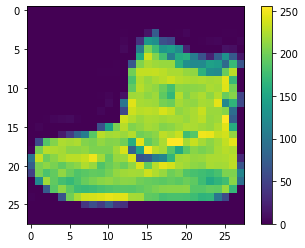

In [ ]:
# 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다:

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# 데이터 전처리: 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정

train_images = train_images / 255.0

test_images = test_images / 255.0

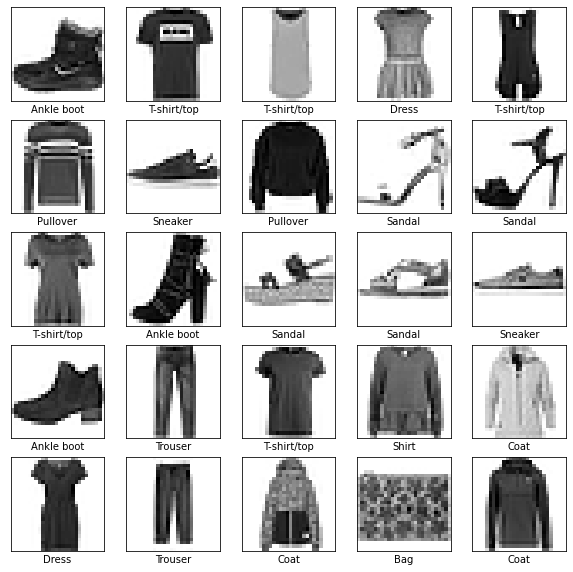

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# 모델 구성
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              # from_logits: 모델의 출력값이 문제에 맞게 normalize 되었느냐의 여부(True: None normalize)
              metrics=['accuracy'])

In [ ]:
# 모델 훈련
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4937 - accuracy: 0.8275
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3705 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3335 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3105 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2924 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2778 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2670 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2549 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2474 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.236

In [ ]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3438 - accuracy: 0.8807 - 524ms/epoch - 2ms/step

Test accuracy: 0.8806999921798706


In [ ]:
# 모델의 선형 출력, 로짓. 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환합니다.
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
# 예측하기
predictions = probability_model.predict(test_images)

In [ ]:
# 테스트 세트에 있는 각 이미지의 레이블을 예측했습니다. 첫 번째 예측을 확인
predictions[0]

array([1.2967266e-05, 5.0606230e-09, 3.7603269e-07, 5.0334716e-11,
       1.2274041e-06, 7.7608852e-03, 1.6057027e-07, 7.3867962e-03,
       1.4463492e-05, 9.8482311e-01], dtype=float32)

In [ ]:
# 이 예측은 10개의 숫자 배열로 나타납니다. 
# 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다. 가장 높은 신뢰도를 가진 레이블을 찾아보죠:

np.argmax(predictions[0])

9

In [ ]:
# 모델은 이 이미지가 앵클 부츠(class_name[9])라고 가장 확신하고 있습니다. 이 값이 맞는지 테스트 레이블을 확인

test_labels[0]

9

In [ ]:
# 10개 클래스에 대한 예측을 모두 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

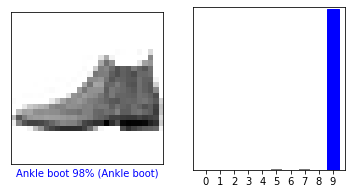

In [ ]:
# 예측 확인
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

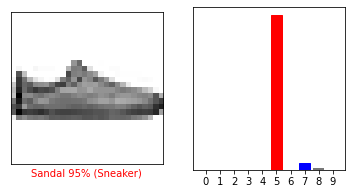

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

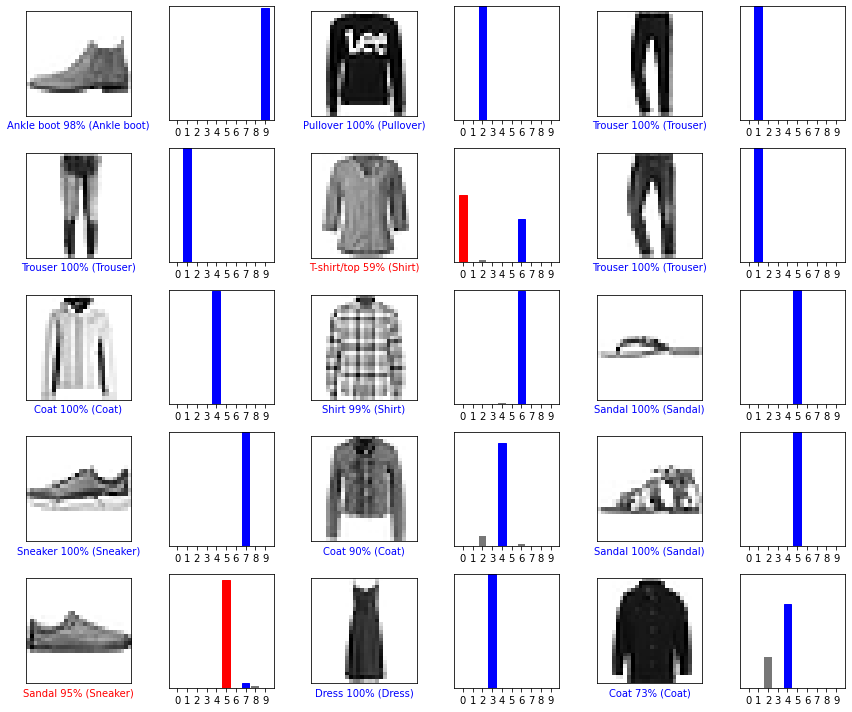

In [ ]:
# 몇 개의 이미지의 예측을 출력해 보죠.
# 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색입니다. 
# 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)입니다. 신뢰도 점수가 높을 때도 잘못 예측할 수 있습니다.

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# 마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만듭니다.
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
# 이제 이 이미지의 예측을 만듭니다:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.0201809e-05 3.6659785e-15 9.9961120e-01 3.0196214e-11 2.7648199e-04
  2.0952722e-11 8.2062819e-05 1.7617667e-18 4.2385889e-13 2.8671136e-17]]


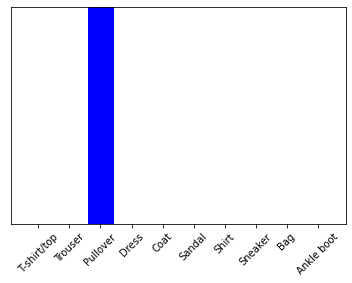

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
# tf.keras.Model.predict는 데이터 배치의 각 이미지에 대해 하나의 목록씩 목록의 목록을 반환합니다. 
# 배치에서 (유일한) 이미지에 대한 예측을 가져옵니다.
np.argmax(predictions_single[0])

2

### 실습 02) <a href=https://www.tensorflow.org/tutorials/keras/regression>자동차 연비 예측하기</a>

(링크 참조하면 자세한 설명 되어 있음)

In [ ]:
# 산점도 행렬을 그리기 위해 seaborn 패키지를 설치합니다
!pip install -q seaborn

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


In [ ]:
# 데이터셋 다운로드
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

40960/30286 [========================================] - 0s 1us/step


'/root/.keras/datasets/auto-mpg.data'

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
# 데이터셋 정제: 일부 데이터가 누락되어 있음
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
# 누락된 데이터는 삭제해줌.
dataset = dataset.dropna()

In [ ]:
# "Origin" 열은 수치형이 아니고 범주형이므로 원-핫 인코딩(one-hot encoding)으로 변환하겠습니다
origin = dataset.pop('Origin')

In [ ]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [ ]:
# 데이터셋 분할
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

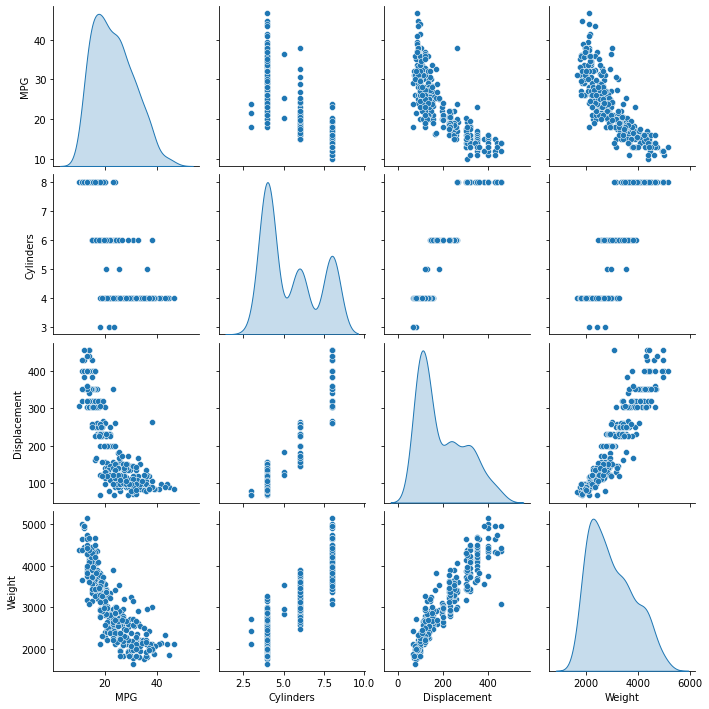

In [ ]:
# 데이터 조사
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [ ]:
# 전반적인 통계 확인
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [ ]:
# 특성과 레이블 분리
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [ ]:
# 데이터 정규화
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
# 모델 생성
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
# 모델 정보 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                640       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 실행
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.23509522],
       [-0.04161419],
       [ 0.1812914 ],
       [-0.24486071],
       [-0.37984347],
       [ 0.0139197 ],
       [-0.39962044],
       [-0.25273478],
       [ 0.02602579],
       [-0.5684102 ]], dtype=float32)

In [ ]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
# history 객체에 저장된 통계치를 사용해 모델의 훈련 과정을 시각화해 보죠.

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.856566,1.093202,2.856566,9.993576,2.456419,9.993576,995
996,2.554715,0.986078,2.554715,10.466216,2.517433,10.466216,996
997,2.749185,1.070588,2.749185,9.717805,2.444398,9.717805,997
998,2.580392,1.016968,2.580392,10.328191,2.489399,10.328191,998
999,2.541680,1.039585,2.541680,9.925570,2.455456,9.925570,999


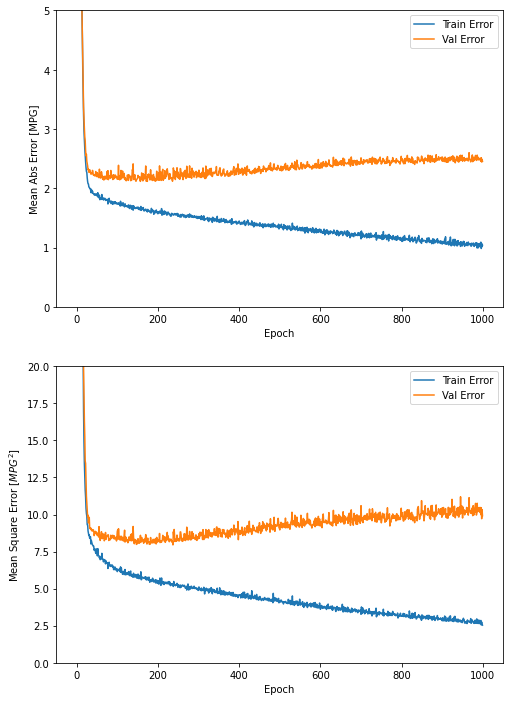

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

이 그래프를 보면 수 백번 에포크를 진행한 이후에는 모델이 거의 향상되지 않는 것 같습니다. model.fit 메서드를 수정하여 검증 점수가 향상되지 않으면 자동으로 훈련을 멈추도록 만들어 보죠. 에포크마다 훈련 상태를 점검하기 위해 EarlyStopping 콜백(callback)을 사용하겠습니다. 지정된 에포크 횟수 동안 성능 향상이 없으면 자동으로 훈련이 멈춥니다.


....................................................................................................
..................

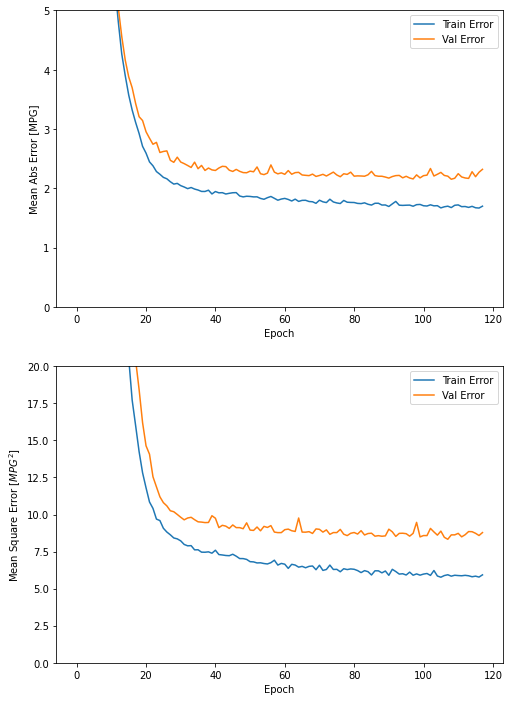

In [ ]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# patience는 기준되는 값이 연속으로 몇 번 이상 향상되지 않을 때 종료시킬 것인지를 뜻함.

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 5.3486 - mae: 1.7162 - mse: 5.3486 - 33ms/epoch - 11ms/step
테스트 세트의 평균 절대 오차:  1.72 MPG


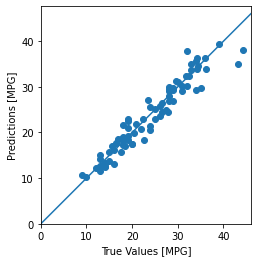

In [ ]:
# 예측
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

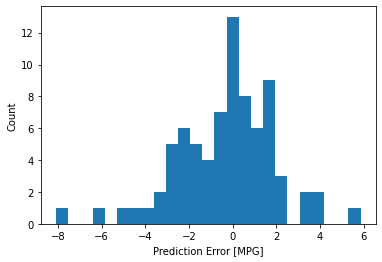

In [ ]:
# 오차 분포 파악
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

### 실습 03) <a href=https://www.tensorflow.org/tutorials/keras/keras_tuner>하이퍼파라미터 튜닝하기</a>

(링크 참조하면 자세한 설명이 있음)

In [ ]:
import tensorflow as tf
from tensorflow import keras

import IPython

In [ ]:
# keras tuner 설치
!pip install -q -U keras-tuner
import kerastuner as kt

     |████████████████████████████████| 98 kB 4.0 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#  Keras Tuner를 사용하여 Fashion MNIST 데이터세트에서 의류 이미지를 분류하는 머신러닝 모델에 가장 적합한 하이퍼파라미터를 찾습니다.
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

In [ ]:
# 모델 정의
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer 
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])

  return model

튜너를 인스턴스화하여 하이퍼튜닝을 수행합니다. Keras Tuner에는 RandomSearch, Hyperband, BayesianOptimization 및 Sklearn의 네 가지 튜너가 있습니다. 이 튜토리얼에서는 Hyperband 튜너를 사용합니다.



In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 4,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt')

In [ ]:
# 하이퍼파라미터 검색을 실행하기 전에 훈련 단계가 끝날 때마다 훈련 결과를 지우도록 콜백을 정의합니다.
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
# 하이퍼파라미터 검색 실행

# search는 어느정도 최적의 하이퍼파라미터가 탐색되면 중단하고 best_hps에 최적의 파라미터값을 전달해주고 재훈련하면 된다.
# 체크포인트로 계속해서 하이퍼파라미터가 저장되고 있기 때문에 실행하다 중단해도 됨.
tuner.search(img_train, label_train, epochs = 10, validation_data = (img_test, label_test), callbacks = [ClearTrainingOutput()])

In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 416 and the optimal learning rate for the optimizer
is 0.001.



In [ ]:
# 검색에서 최적의 하이퍼파라미터로 모델을 재훈련합니다.
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
model.fit(img_train, label_train, epochs = 10, validation_data = (img_test, label_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4750 - accuracy: 0.8311 - val_loss: 0.4314 - val_accuracy: 0.8414
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3584 - accuracy: 0.8687 - val_loss: 0.3686 - val_accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3210 - accuracy: 0.8814 - val_loss: 0.3764 - val_accuracy: 0.8705
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3015 - accuracy: 0.8889 - val_loss: 0.3625 - val_accuracy: 0.8739
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2807 - accuracy: 0.8948 - val_loss: 0.3374 - val_accuracy: 0.8806
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2682 - accuracy: 0.8990 - val_loss: 0.3299 - val_accuracy: 0.8804
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2538 - accuracy: 0.9053 - val_loss: 0.3475 - val_accura

# Reference

1. Do it! 딥러닝 교과서
2. 케라스 창시자에게 배우는 딥러닝
3. https://www.tensorflow.org/tutorials/keras

---

*made by* <font color='6699ff'>Kim Geon</font>(DCU, major.AI·BD)

---